In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [29]:
#Dataset load
#Using pandas setting it into a convenient dataframe
headers=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
data = pd.read_csv('/content/crx.data',names=headers)

In [30]:
#Overviewing the dataframe
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [31]:
#Analysing the data for values that the attributes take so
#we may drop the redundant attributes 
for col in data.columns:
  print(col, data[col].unique())

A ['b' 'a' '?']
B ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.

In [32]:
#dropping the attributes that are not continous
new_data = data.drop(["C", "H", "B", "O", "K", "N"], axis = 1)
data = new_data

#dropping the data instances which have missing values {?}
data = data.replace('?',np.nan)
data = data.dropna(axis=0)
data.isnull().sum()

A    0
D    0
E    0
F    0
G    0
I    0
J    0
L    0
M    0
P    0
dtype: int64

In [33]:
#dataframe after dropping attributes
for col in data.columns:
  print(col, data[col].unique())

A ['b' 'a']
D ['u' 'y' 'l']
E ['g' 'p' 'gg']
F ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
G ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
I ['t' 'f']
J ['t' 'f']
L ['f' 't']
M ['g' 's' 'p']
P ['+' '-']


In [34]:
#overviewing the data again
data

,A,D,E,F,G,I,J,L,M,P
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+
...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,f,g,-
686,a,u,g,c,v,f,t,t,g,-
687,a,y,p,ff,ff,f,t,t,g,-
688,b,u,g,aa,v,f,f,f,g,-


In [35]:
# Separate target values and features values
y = data['P']
features = data.drop(['P'], axis=1)

In [36]:
#Features preview
features.head()

,A,D,E,F,G,I,J,L,M
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [37]:
# Feature list after dropping
object_cols = ['A','D','E','F','G','I','J','L','M']

# categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])


In [38]:
# Preview
X.head()

,A,D,E,F,G,I,J,L,M
0,1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0,2.0


In [39]:
#separating data for naive bayes
x_nb=data.iloc[:,:-1].values
y_nb=y.values

In [40]:
#train test split the data for knn
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state=1)

In [41]:
#knn with k fold cross validation
x=0
k=0
train_acc=[20]
print("k-fold cross validation")
xpoints = []
ypoints = []
for i in range(2, 20):
  #create a new KNN model
  knn_cv = KNeighborsClassifier(n_neighbors=i)
  #train model with cv of 10 
  cv_scores = cross_val_score(knn_cv, xTrain, yTrain, cv=10)
  av=np.mean(cv_scores)
  xpoints.extend([i])
  ypoints.extend([av])
  print("k=",i,"accuracy",av)
  if(av>x):
    x=av
    k=i
print("best value of number of neighbours", k)

k-fold cross validation
k= 2 accuracy 0.7591119333950046
k= 3 accuracy 0.7782146160962073
k= 4 accuracy 0.7824699352451434
k= 5 accuracy 0.7867715078630897
k= 6 accuracy 0.7846901017576318
k= 7 accuracy 0.7867715078630897
k= 8 accuracy 0.7783071230342274
k= 9 accuracy 0.7782146160962073
k= 10 accuracy 0.7762257169287696
k= 11 accuracy 0.7740055504162812
k= 12 accuracy 0.7634135060129509
k= 13 accuracy 0.7697964847363552
k= 14 accuracy 0.7570305272895468
k= 15 accuracy 0.7484273820536541
k= 16 accuracy 0.7357076780758557
k= 17 accuracy 0.7378353376503237
k= 18 accuracy 0.7313598519888992
k= 19 accuracy 0.7272895467160038
best value of number of neighbours 5


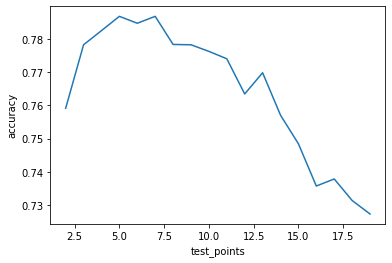

In [42]:
plt.plot(xpoints, ypoints)
plt.xlabel("test_points")
plt.ylabel("accuracy")
plt.show()

In [43]:
#testing on test data with the value of k found in previous cell
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xTrain,yTrain)
test_predict = knn.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
print("test accuracy =",test_acc)


test accuracy = 0.8465346534653465


In [44]:
#analyzing the confusion matrix, precision, recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(yTest, test_predict))
print(confusion_matrix(yTest, test_predict))

              precision    recall  f1-score   support

           +       0.81      0.82      0.82        84
           -       0.87      0.86      0.87       118

    accuracy                           0.85       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.85      0.85      0.85       202

[[ 69  15]
 [ 16 102]]


In [45]:
def fit(X_train, Y_train):
    result = {}
    # Finding all possible class values
    class_values = set(Y_train)
    # adding the class values as first level of dict
    for current_class in class_values:
        result[current_class] = {}
        # Total data points
        result["total_data"] = len(Y_train)
        # Rows where output is current_class
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        # The current class will have all features
        num_features = X_train.shape[1]
        # Count of data points with Y = current_class as output
        result[current_class]["total_count"] = len(Y_train_current)
        for j in range(1, num_features + 1):
            # adding features as second level of dict
            result[current_class][j] = {}
            # This dict will store count of each feature for current class
            all_possible_values = set(X_train[:, j - 1]) # all possible values of current feature
            for current_value in all_possible_values:
                # Store count for each feature corresponding to current class
                # Selecting all rows from current class rows where value is current value and summing all Trues
                result[current_class][j][current_value] = (X_train_current[:, j - 1] == current_value).sum() 
    return result

In [46]:
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"]) # prob y=current_class
    num_features = len(dictionary[current_class].keys()) - 1 # -1 for total_count key
    for j in range(1, num_features + 1):
        # jth features value for current data point
        xj = x[j - 1]
        # probability of feature having a particular value
        count_current_class_with_value_xj = dictionary[current_class][j][xj] + 1 # laplace correction
        count_current_class = dictionary[current_class]["total_count"] + len(dictionary[current_class][j].keys())
        current_xj_probability = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
        output = output + current_xj_probability
    return output

In [47]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if current_class == "total_data":
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [48]:
#function for prediction 
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred


In [49]:
#train, test, split
X_train, X_test, Y_train, Y_test = train_test_split(x_nb, y_nb, test_size = 0.3, random_state=1)

In [50]:
dictionary = fit(X_train, Y_train)

In [51]:
Y_pred = predict(dictionary, X_test)

In [52]:
#analyzing the accuracy
test_acc_nb = accuracy_score(Y_test, Y_pred)
print("test accuracy =",test_acc_nb)

test accuracy = 0.9306930693069307


In [53]:
#analyzing the confusion matrix, precision, recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           +       0.92      0.92      0.92        84
           -       0.94      0.94      0.94       118

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202

[[ 77   7]
 [  7 111]]
